<a href="https://colab.research.google.com/github/ayberkcorp/cap5610-machine_learning/blob/master/hw3/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

### Q1:

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate

train_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/hw3/Football/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/hw3/Football/test.csv')

train_df = train_df.drop(['ID', 'Date'], axis=1)
test_df = test_df.drop(['ID', 'Date'], axis=1)

for col in train_df.columns:
  train_df[col] = train_df[col].astype('category').cat.codes
  test_df[col] = test_df[col].astype('category').cat.codes

X_train = train_df.drop('Label', axis=1)
Y_train = train_df['Label']
X_test = test_df.drop('Label', axis=1)
Y_test = test_df['Label']

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print('Naive Bayes:')
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('Precision:', metrics.precision_score(Y_test, Y_pred))
print('Recall:', metrics.recall_score(Y_test, Y_pred))
print('F1 Score:', metrics.f1_score(Y_test, Y_pred))
print('\nPredictions (1=Win and 0=Lose):')
print(Y_pred)

classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

print('\n\nKNN:')
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('Precision:', metrics.precision_score(Y_test, Y_pred))
print('Recall:', metrics.recall_score(Y_test, Y_pred))
print('F1 Score:', metrics.f1_score(Y_test, Y_pred))
print('\nPredictions (1=Win and 0=Lose):')
print(Y_pred)

Naive Bayes:
Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.7777777777777778
F1 Score: 0.8750000000000001

Predictions (1=Win and 0=Lose):
[1 0 1 1 1 0 0 1 1 0 1 0]


KNN:
Accuracy: 0.5833333333333334
Precision: 0.75
Recall: 0.6666666666666666
F1 Score: 0.7058823529411765

Predictions (1=Win and 0=Lose):
[0 1 1 0 1 0 1 1 1 1 1 0]


# Task 2

### Q1:

In [2]:
# This is reused code from hw2 (kept test_df/combine even though it
# is not needed since we will be splitting the training set
# so that I did not have to rewrite this code)

train_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/Titanic/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/ayberkcorp/cap5610-machine_learning/master/Titanic/test.csv')
combine = [train_df, test_df]

train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

freq_port = train_df.Embarked.dropna().mode()[0]
train_df = train_df.fillna(freq_port)

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# New code starts here (dropped unimportant features based on information from hw2)

X_train = train_df.drop(['Survived', 'SibSp', 'Parch', 'Embarked'], axis=1)
Y_train = train_df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

scores = cross_validate(classifier, X_train, y=Y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
scores_df = pd.DataFrame(scores)
scores_df.mean(axis=0)

fit_time          0.001482
score_time        0.003108
test_accuracy     0.752733
test_precision    0.648486
test_recall       0.749546
test_f1           0.694675
dtype: float64

### Q2:

Best k value and its associated accuracy: k = 16 , 0.8044692737430168


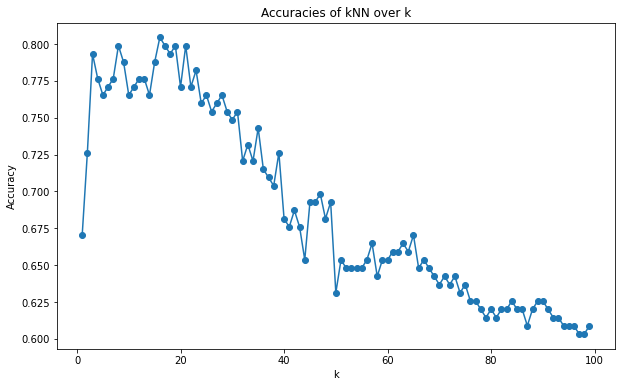

In [23]:
accuracies = []
k_range = range(1, 100)

for i in k_range:
    classifier = KNeighborsClassifier(n_neighbors = i)
    neighbor = classifier.fit(X_train, Y_train)
    y_hat = neighbor.predict(X_test)
    accuracies.append(metrics.accuracy_score(Y_test, y_hat))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracies of kNN over k')
plt.xlabel('k')
plt.ylabel('Accuracy')

best_accuracy = max(accuracies)
best_k = accuracies.index(best_accuracy) + 1

print('Best k value and its associated accuracy: k =', best_k, '\b,', best_accuracy)